# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv", index_col=False)

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [84]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [85]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df.title.nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [10]:
df.title

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [11]:
df.title.isnull().sum()

0

In [12]:
import re

In [13]:
df.title = df.title.apply(lambda x: re.findall("\w+",x)[0])

In [14]:
df.title.head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: title, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [15]:
df.title.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

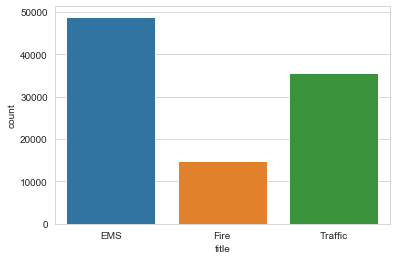

In [16]:
sns.set_style("whitegrid")
sns.countplot(df.title)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [17]:
type(df.timeStamp[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [18]:
df.timeStamp.isnull().sum()

0

In [19]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [20]:
df.timeStamp.dtype

dtype('<M8[ns]')

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

In [21]:
df["Hour"] = df.timeStamp.dt.hour
df["Month"] = df.timeStamp.dt.month
df["Day of Week"] = df.timeStamp.dt.dayofweek

In [22]:
df.Hour.head(3)

0    17
1    17
2    17
Name: Hour, dtype: int64

In [23]:
df.Month.head(3)

0    12
1    12
2    12
Name: Month, dtype: int64

In [24]:
df["Day of Week"].head(3)

0    3
1    3
2    3
Name: Day of Week, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df["Day of Week"].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [26]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
df["Day of Week"] = df["Day of Week"].map(dmap)

In [28]:
df["Day of Week"].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

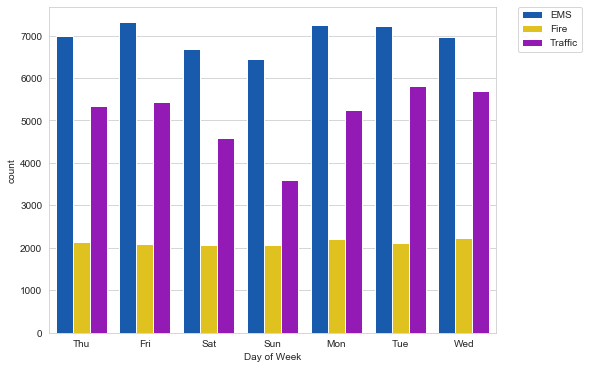

In [29]:
plt.subplots(figsize=(8,6))
sns.countplot(df["Day of Week"],hue=df["title"], palette="prism")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Now do the same for Month:**

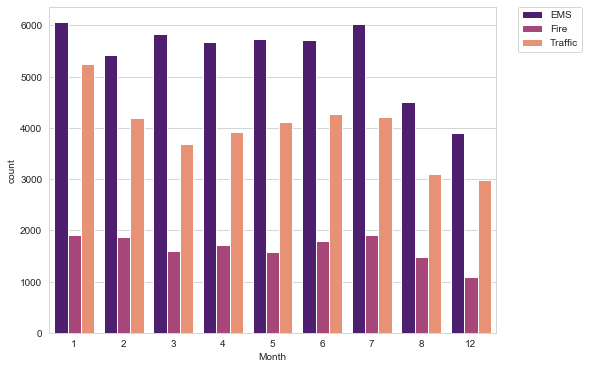

In [30]:
plt.subplots(figsize=(8,6))
sns.countplot(df["Month"],hue=df["title"], palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Did you notice something strange about the Plot?**

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [31]:
byMonth = df.groupby("Month").count()

In [90]:
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

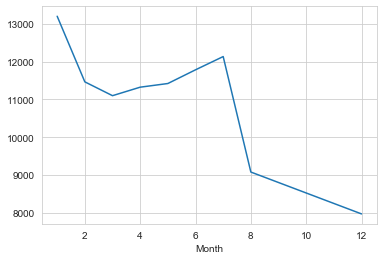

In [94]:
df.groupby("Month")["e"].count().plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [34]:
byMonth.reset_index(inplace=True)

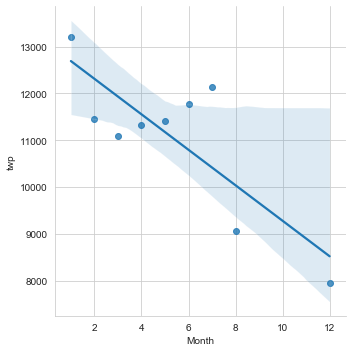

In [35]:
sns.lmplot(x="Month", y="twp", data=byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [36]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())

In [37]:
df["Date"].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

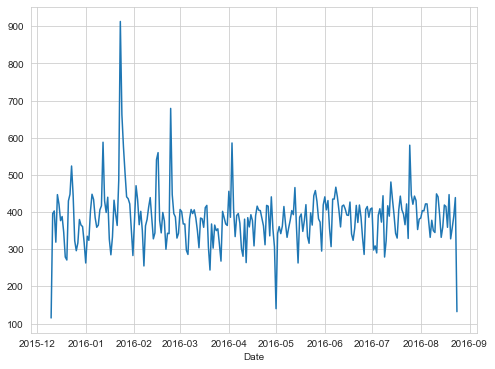

In [38]:
byDate = df.groupby("Date").count()
plt.subplots(figsize=(8,6))
byDate.desc.plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [46]:
df.title.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

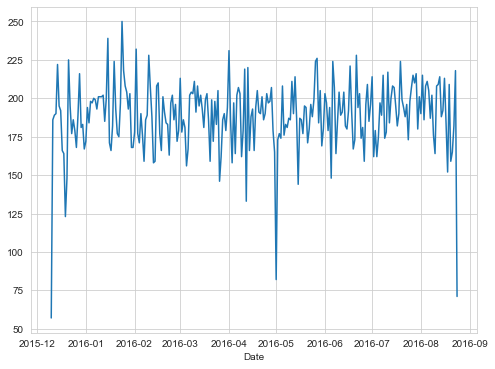

In [50]:
byDateEMS = df[df["title"]=="EMS"].groupby("Date").count()
plt.subplots(figsize=(8,6))
byDateEMS.desc.plot()

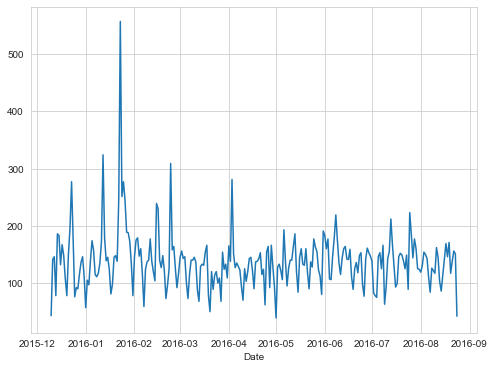

In [51]:
byDateTraffic = df[df["title"]=="Traffic"].groupby("Date").count()
plt.subplots(figsize=(8,6))
byDateTraffic.desc.plot()

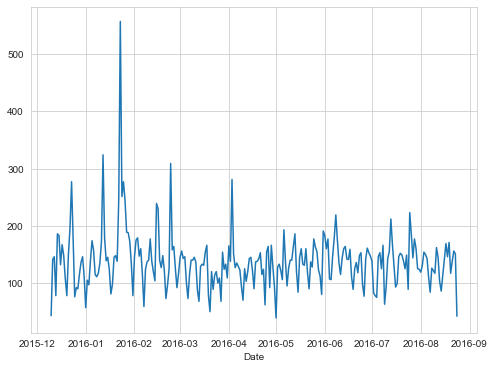

In [52]:
byDateFire = df[df["title"]=="Traffic"].groupby("Date").count()
plt.subplots(figsize=(8,6))
byDateFire.desc.plot()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [61]:
dfhour_week = df.groupby(["Day of Week", "Hour"])["desc"].count()
dfnew = dfhour_week.unstack()
dfnew.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

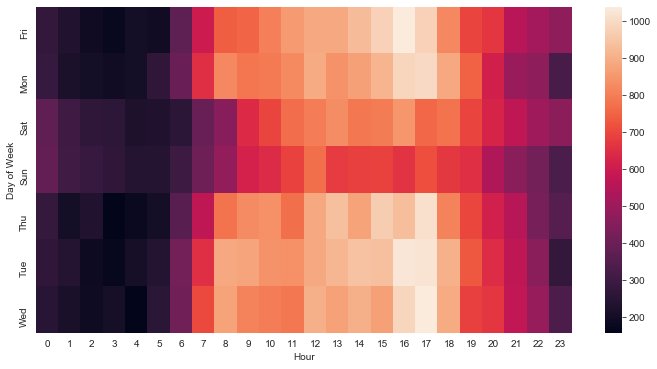

In [65]:
plt.subplots(figsize=(12,6))
sns.heatmap(dfnew)

** Now create a clustermap using this DataFrame. **

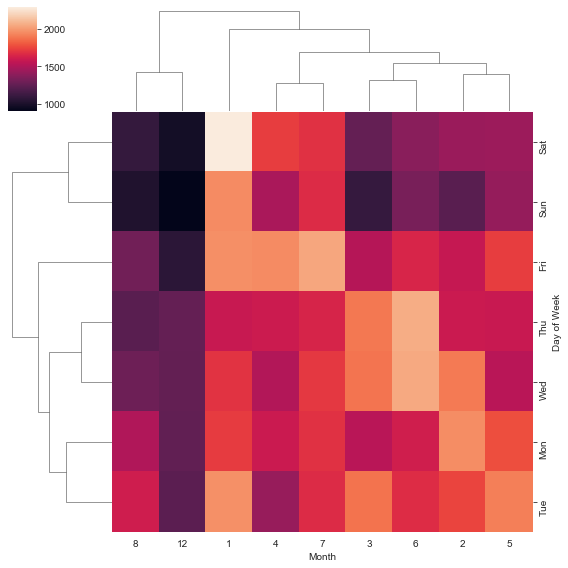

In [78]:
sns.clustermap(dfnew, figsize=(8,8))

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [73]:
dfhour_week = df.groupby(["Day of Week", "Month"])["desc"].count()
dfnew = dfhour_week.unstack()
dfnew.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


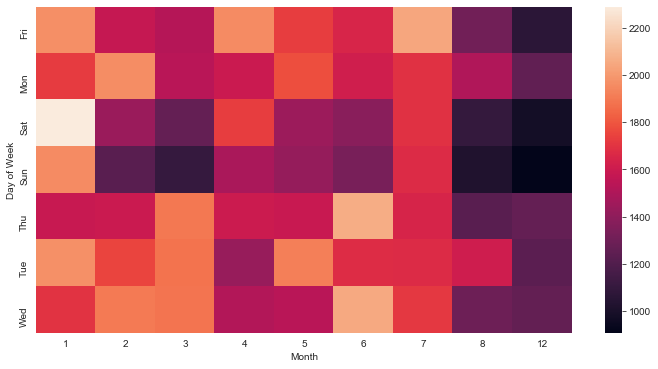

In [97]:
plt.subplots(figsize=(12,6))
sns.heatmap(dfnew)

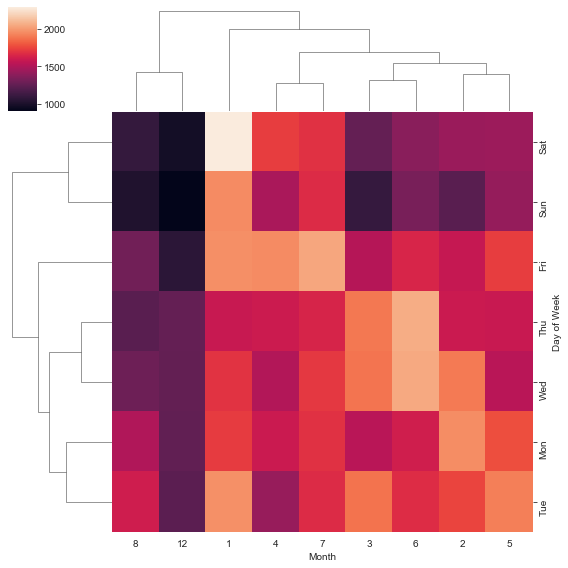

In [81]:
sns.clustermap(dfnew, figsize=(8,8))

In [99]:
df["twp"].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64